<a href="https://colab.research.google.com/github/K1000oTorres/Mi-primer-repositorio/blob/main/Data_Augmentation_Echo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importa la librería de drive para trabajar sobre ella

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Se importan los datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
#Carga de datos X,Y
dataset_images = np.load("/content/drive/MyDrive/Echocardiography/X_data_gray.npy",allow_pickle=True)
dataset_points = np.load("/content/drive/MyDrive/Echocardiography/Y_data_Pos_EF.npy",allow_pickle=True)
dataset_mask = np.load("/content/drive/MyDrive/Echocardiography/Y_data_mask.npy",allow_pickle=True)

Para mirar algunas de las imágenes en el fin de díastole y sístole se hace lo siguiente

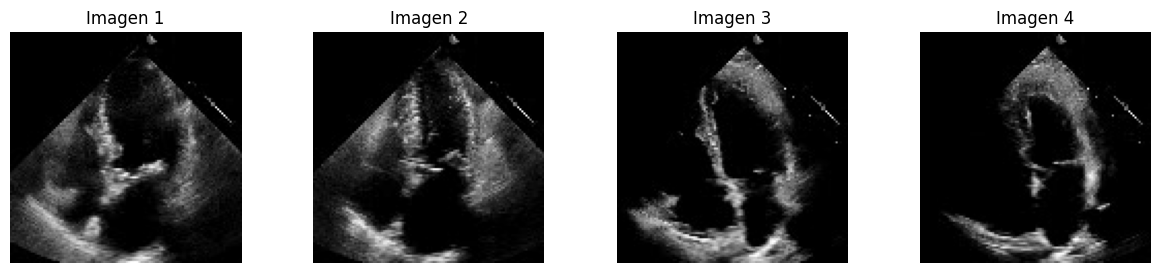

In [ ]:
# Muestra las primeras 4 imágenes
plt.figure(figsize=(15, 3))  
for i in range(4):
    plt.subplot(1, 4,i+1)
    image = dataset_images[i].astype(np.float32)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Desactiva los ejes
    plt.title('Imagen {}'.format(i+1))  # Añade un título a cada imagen

plt.show()

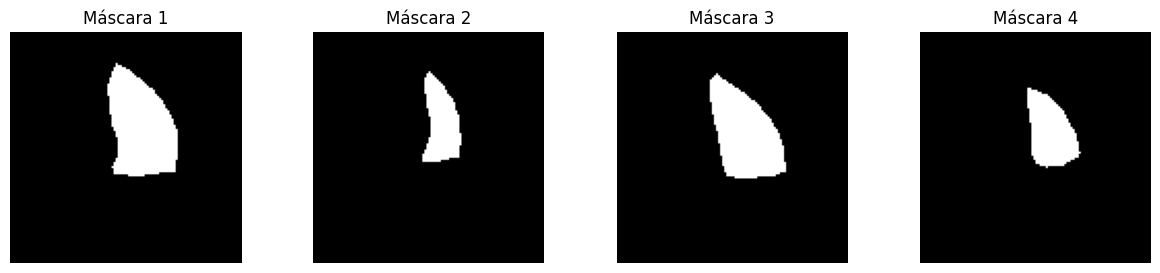

In [ ]:
# Muestra las primeras 4 Máscaras
plt.figure(figsize=(15, 3))  
for i in range(4):
    plt.subplot(1, 4, i+1)
    image = dataset_mask[i].astype(np.float32)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Desactiva los ejes
    plt.title('Máscara {}'.format(i+1))  

plt.show()

Se identifican los valores de la fracción de eyección para cada rango

In [ ]:
# Obtener la columna 85
column_85 = dataset_points[:,-1]

# Contar los valores en los rangos especificados
count_0_10 = np.sum((column_85 >= 0) & (column_85 < 10))
count_10_20 = np.sum((column_85 >= 10) & (column_85 < 20))
count_20_30 = np.sum((column_85 >= 20) & (column_85 < 30))
count_30_40 = np.sum((column_85 >= 30) & (column_85 < 40))
count_40_50 = np.sum((column_85 >= 40) & (column_85 < 50))
count_50_60 = np.sum((column_85 >= 50) & (column_85 < 60))
count_60_70 = np.sum((column_85 >= 60) & (column_85 < 70))
count_70_80 = np.sum((column_85 >= 70) & (column_85 < 80))
count_80_90 = np.sum((column_85 >= 80) & (column_85 <= 90))
count_90_100 = np.sum((column_85 >= 90) & (column_85 <= 100))
count_0_40 = np.sum((column_85 >= 0) & (column_85 < 40))
count_40_50 = np.sum((column_85 >= 40) & (column_85 < 50))
count_50_100 = np.sum((column_85 >= 50) & (column_85 < 100))
# Imprimir los resultados
print("Cantidad de valores entre 0 y 10:", count_0_10)
print("Cantidad de valores entre 10 y 20:", count_10_20)
print("Cantidad de valores entre 20 y 30:", count_20_30)
print("Cantidad de valores entre 30 y 40:", count_30_40)
print("Cantidad de valores entre 40 y 50:", count_40_50)
print("Cantidad de valores entre 50 y 60:", count_50_60)
print("Cantidad de valores entre 60 y 70:", count_60_70)
print("Cantidad de valores entre 70 y 80:", count_70_80)
print("Cantidad de valores entre 80 y 90:", count_80_90)
print("Cantidad de valores entre 90 y 100:", count_90_100)
print("Cantidad de valores entre 0 y 40:", count_0_40)
print("Cantidad de valores entre 40 y 50:",count_40_50)
print("Cantidad de valores entre 50 y 100:",count_50_100)

Cantidad de valores entre 0 y 10: 18
Cantidad de valores entre 10 y 20: 310
Cantidad de valores entre 20 y 30: 918
Cantidad de valores entre 30 y 40: 1266
Cantidad de valores entre 40 y 50: 1924
Cantidad de valores entre 50 y 60: 6526
Cantidad de valores entre 60 y 70: 8300
Cantidad de valores entre 70 y 80: 574
Cantidad de valores entre 80 y 90: 24
Cantidad de valores entre 90 y 100: 0
Cantidad de valores entre 0 y 40: 2512
Cantidad de valores entre 40 y 50: 1924
Cantidad de valores entre 50 y 100: 15424


In [ ]:
# Identificar los índices con valores en el rango de 0 a 40
indices_0_40 = np.where((dataset_points[:, -1] >= 0) & (dataset_points[:, -1] < 40))[0]

# Identificar los índices con valores en el rango de 40 a 50
indices_40_50 = np.where((dataset_points[:, -1] >= 40) & (dataset_points[:, -1] < 50))[0]

# Identificar los índices con valores mayores que 50
indices_mayor_50 = np.where(dataset_points[:, -1] >= 50)[0]

# Imprimir los resultados
print("Índices con valores en el rango de 0 a 40:", indices_0_40)
print(len(indices_0_40))
print("Índices con valores en el rango de 40 a 50:", indices_40_50)
print(len(indices_40_50))
print("Índices con valores mayores que 50:", indices_mayor_50)
print(len(indices_mayor_50))

Índices con valores en el rango de 0 a 40: [    8     9    12 ... 19849 19856 19857]
2512
Índices con valores en el rango de 40 a 50: [   18    19    20 ... 19823 19832 19833]
1924
Índices con valores mayores que 50: [    0     1     2 ... 19855 19858 19859]
15424


Otra manera de hacerlo es ir visualizando uno por uno y mirar que efectivamente se cumpla lo de arriba

In [ ]:
size = dataset_points.shape
print("Tamaño del archivo Y_data_Pos_EF.npy:", size)
print(len(dataset_points[0]))
print(dataset_points[9])
# print(dataset_points[9] [-1]) # Para mirar unicamente el que corresponde a FE

Tamaño del archivo Y_data_Pos_EF.npy: (19860, 85)
85
[57.640625 25.19270833 62.5625 82.06770833 53.05593182 27.04748722
 59.19568369 26.51616254 50.34648037 30.19801217 62.30580108 29.16307095
 47.63702892 33.34853711 65.41591846 31.80997936 45.18581183 36.47671485
 67.43554464 34.5512572 44.68204185 39.43636352 69.08233547 37.32479965
 44.17827186 42.39601218 70.72912629 40.09834209 43.67450188 45.35566085
 72.37591711 42.87188453 43.17073189 48.31530951 73.68302543 45.67482257
 42.66696191 51.27495817 74.69937385 48.50292253 42.35533512 54.21797906
 75.71572227 51.33102248 42.43844543 57.12684001 76.73207069 54.15912244
 42.52155574 60.03570096 77.34151086 57.02243561 42.60466605 62.9445619
 77.37388033 59.93568759 42.68777637 65.85342285 77.40624979 62.84893957
 42.77088668 68.76228379 77.43861926 65.76219155 42.85399699 71.67114474
 77.47098872 68.67544353 43.44299388 74.53622704 77.50335819 71.58869552
 44.20306789 77.38650459 77.1339207 74.53671925 44.9631419 80.23678214
 76.6524

Para identificar el tipo de cada dato en el archivo numpy

In [ ]:
print(dataset_images[1].dtype)

object


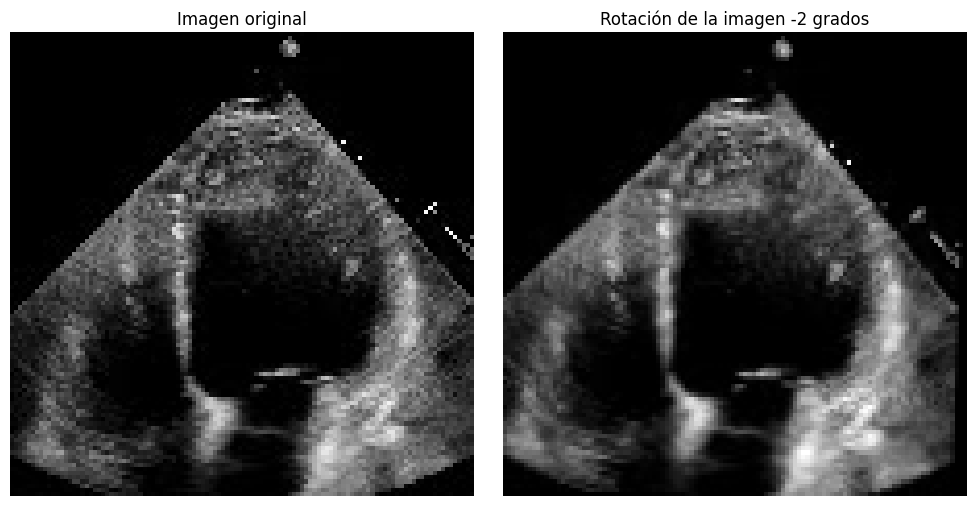

In [ ]:
# Obtener la imagen de la matriz tridimensional
imagen = dataset_images[8].astype(np.float32)

# Definir el ángulo de rotación
angulo = -2

# Obtener el tamaño de la imagen
alto, ancho = image.shape[:2]

# Calcular el punto origen, para este caso es (ancho/2,0)
centro = (ancho // 2, 0)

# Definir la matriz de transformación
M = cv2.getRotationMatrix2D(centro, angulo, 1.0)

# Aplicar la rotación a la imagen
imagen_rotada = cv2.warpAffine(imagen, M, (ancho, alto))

# Visualizar la imagen original y la imagen rotada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagen, cmap='gray')
axes[0].set_title('Imagen original')
axes[0].axis('off')
axes[1].imshow(imagen_rotada, cmap='gray')
axes[1].set_title(f'Rotación de la imagen {angulo} grados')
axes[1].axis('off')
plt.tight_layout()
plt.show()

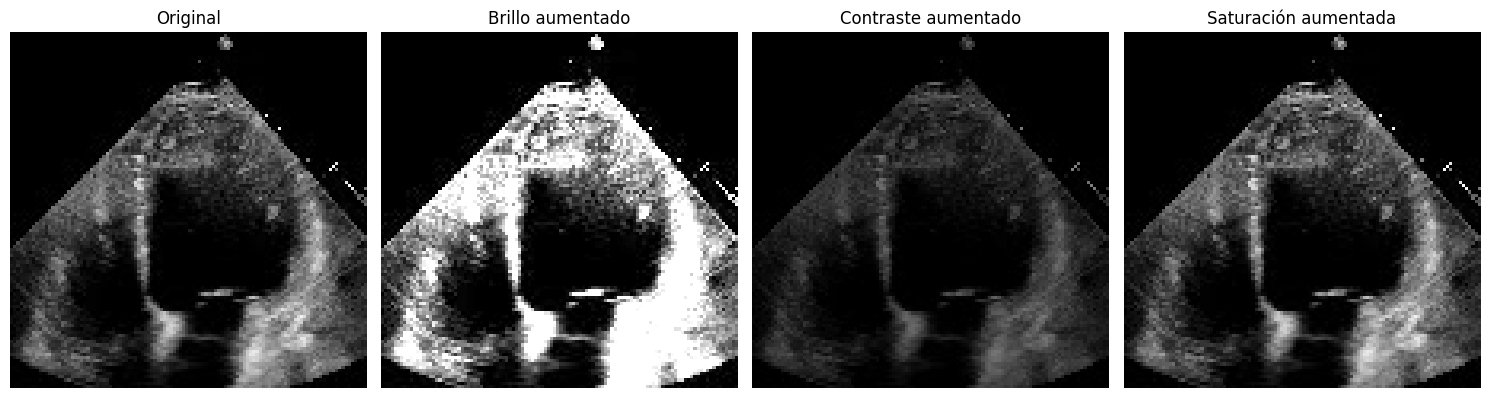

In [ ]:
# Obtener la imagen de la matriz tridimensional
imagen = dataset_images[8].astype(np.float32)

ajustes = [
    ("Original", 1.0, 1.0, 1.0),  # Imagen original
    ("Brillo aumentado", 2.5, 1.0, 1.0),
    ("Contraste aumentado", 1.0, 0.5, 1.0),
    ("Saturación aumentada", 1.0, 1.0, 1.5)
]

# Crear una figura para visualizar las imágenes
fig, axes = plt.subplots(1, len(ajustes), figsize=(15, 5))

# Iterar sobre los ajustes y aplicarlos a la imagen
for i, (titulo, brillo, contraste, saturacion) in enumerate(ajustes):
    # Crear una copia de la imagen original
    imagen_ajustada = imagen.copy()

    # Convertir la imagen a formato BGR (suponiendo que es de un solo canal)
    imagen_ajustada = cv2.cvtColor(imagen_ajustada, cv2.COLOR_GRAY2BGR)

    # Aplicar los ajustes de brillo, contraste y saturación
    imagen_ajustada *= brillo
    imagen_ajustada = np.clip(imagen_ajustada, 0, 255).astype(np.uint8)
    imagen_ajustada = cv2.convertScaleAbs(imagen_ajustada, alpha=contraste, beta=0)

    # Convertir la imagen a espacio de color HSV
    imagen_ajustada = cv2.cvtColor(imagen_ajustada, cv2.COLOR_BGR2HSV)
    imagen_ajustada[..., 1] = np.clip(imagen_ajustada[..., 1] * saturacion, 0, 255).astype(np.uint8)

    # Convertir la imagen de vuelta a BGR
    imagen_ajustada = cv2.cvtColor(imagen_ajustada, cv2.COLOR_HSV2BGR)

    # Visualizar la imagen en el subplot correspondiente
    axes[i].imshow(cv2.cvtColor(imagen_ajustada, cv2.COLOR_BGR2RGB))
    axes[i].set_title(titulo)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Guardar la imagen con aumento de luz en un archivo .npy 

In [ ]:
# Obtener los índices de las imágenes que cumplen con la condición
indices_0_40 = np.where((dataset_points[:, -1] >= 0) & (dataset_points[:, -1] < 40))[0]
indices_40_50 = np.where((dataset_points[:, -1] >= 40) & (dataset_points[:, -1] < 50))[0]

# Crear una lista para almacenar las imágenes ajustadas
imagenes_ajustadas = []
imagenes_ajustadas_40_50 = []

ajustes_brillo = [("Brillo aumentado", 2.5)]

# Iterar sobre los índices y aplicar el ajuste de brillo a cada imagen correspondiente
for indice in indices_0_40:
    # Obtener la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Aplicar el ajuste de brillo a la imagen
    for titulo, brillo in ajustes_brillo:
        # Crear una copia de la imagen original
        imagen_ajustada = imagen.copy()

        # Convertir la imagen a formato BGR (suponiendo que es de un solo canal)
        imagen_ajustada = cv2.cvtColor(imagen_ajustada, cv2.COLOR_GRAY2BGR)

        # Aplicar el ajuste de brillo
        imagen_ajustada *= brillo
        imagen_ajustada = np.clip(imagen_ajustada, 0, 255).astype(np.uint8)

        # Agregar la imagen ajustada a la lista
        imagenes_ajustadas.append(imagen_ajustada)

for indice in indices_40_50 :
    # Obtener la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Aplicar el ajuste de brillo a la imagen
    for titulo, brillo in ajustes_brillo:
        # Crear una copia de la imagen original
        imagen_ajustada_40_50 = imagen.copy()

        # Convertir la imagen a formato BGR (suponiendo que es de un solo canal)
        imagen_ajustada_40_50 = cv2.cvtColor(imagen_ajustada_40_50, cv2.COLOR_GRAY2BGR)

        # Aplicar el ajuste de brillo
        imagen_ajustada_40_50 *= brillo
        imagen_ajustada_40_50 = np.clip(imagen_ajustada_40_50, 0, 255).astype(np.uint8)

        # Agregar la imagen ajustada a la lista
        imagenes_ajustadas_40_50.append(imagen_ajustada_40_50)

# Construir la ruta completa para guardar el archivo en la ubicación deseada
ruta_guardado = '/content/drive/MyDrive/Echocardiography/brillo_aumentado.npy'
ruta_guardado_40_50 = '/content/drive/MyDrive/Echocardiography/brillo_aumentado_40_50.npy'

# Guardar las imágenes ajustadas en el archivo .npy en la ruta especificada
np.save(ruta_guardado, imagenes_ajustadas)
np.save(ruta_guardado_40_50 , imagenes_ajustadas_40_50)

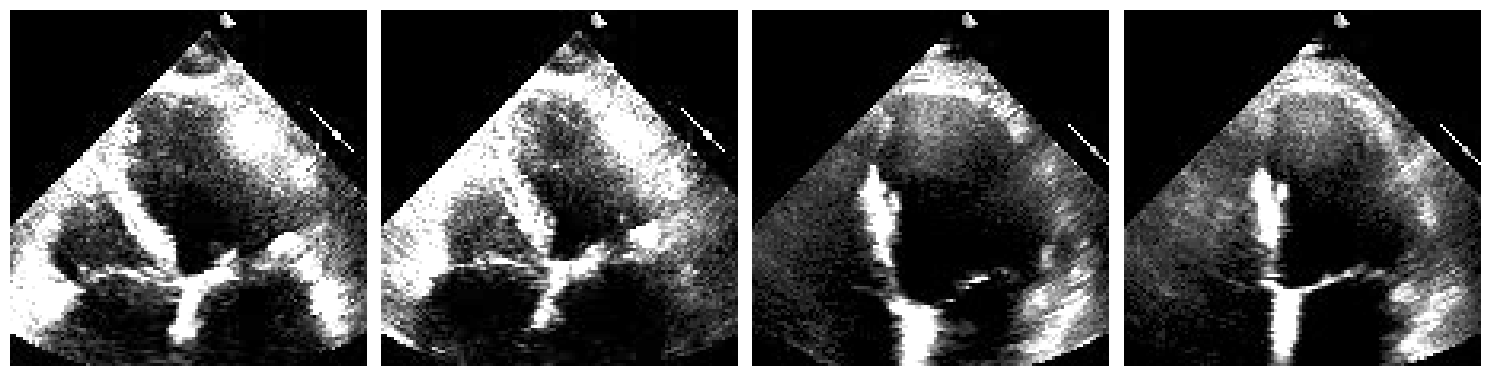

Tamaño de la matriz: (1924, 112, 112)


In [ ]:
# Cargar el archivo numpy
brillo_aumentado_ajustado = np.load("/content/drive/MyDrive/Echocardiography/brillo_aumentado.npy")
brillo_aumentado_ajustado = np.squeeze(brillo_aumentado_ajustado)
brillo_aumentado_ajustado = brillo_aumentado_ajustado[..., 0]  # Eliminar el último canal de color

brillo_aumentado_ajustado_40_50 = np.load("/content/drive/MyDrive/Echocardiography/brillo_aumentado_40_50.npy")
brillo_aumentado_ajustado_40_50 = np.squeeze(brillo_aumentado_ajustado_40_50)
brillo_aumentado_ajustado_40_50 = brillo_aumentado_ajustado_40_50[..., 0]  # Eliminar el último canal de color

# Mostrar las primeras 4 imágenes
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    # Obtener la imagen
    imagen = brillo_aumentado_ajustado_40_50[i]

    # Mostrar la imagen en el subplot correspondiente
    axes[i].imshow(imagen, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
tamaño_brillo = brillo_aumentado_ajustado_40_50.shape
print("Tamaño de la matriz:",tamaño_brillo )

Guardar la imagen con aumento de contraste en un archivo .npy 

In [ ]:
# Obtener los índices de las imágenes que cumplen con la condición
indices_0_40 = np.where((dataset_points[:, -1] >= 0) & (dataset_points[:, -1] < 40))[0]
indices_40_50 = np.where((dataset_points[:, -1] >= 40) & (dataset_points[:, -1] < 50))[0]

# Crear una lista para almacenar las imágenes ajustadas
imagenes_ajustadas_contraste = []
imagenes_ajustadas_contraste_40_50 = []

ajustes_contraste = [("Contraste aumentado", 0.02)]

# Iterar sobre los índices y aplicar el ajuste de contraste a cada imagen correspondiente
for indice in indices_0_40:
    # Obtener la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Aplicar el ajuste de contraste a la imagen
    for titulo, contraste in ajustes_contraste:
        # Crear una copia de la imagen original
        imagen_ajustada = imagen.copy()

        # Convertir la imagen a formato BGR (suponiendo que es de un solo canal)
        imagen_ajustada = cv2.cvtColor(imagen_ajustada, cv2.COLOR_GRAY2BGR)

        # Aplicar el ajuste de contraste
        imagen_ajustada = cv2.convertScaleAbs(imagen_ajustada, alpha=contraste, beta=0)

        # Agregar la imagen ajustada a la lista
        imagenes_ajustadas_contraste.append(imagen_ajustada)

for indice in indices_40_50:
    # Obtener la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Aplicar el ajuste de contraste a la imagen
    for titulo, contraste in ajustes_contraste:
        # Crear una copia de la imagen original
        imagen_ajustada_40_50 = imagen.copy()

        # Convertir la imagen a formato BGR (suponiendo que es de un solo canal)
        imagen_ajustada_40_50 = cv2.cvtColor(imagen_ajustada_40_50, cv2.COLOR_GRAY2BGR)

        # Aplicar el ajuste de contraste
        imagen_ajustada_40_50 = cv2.convertScaleAbs(imagen_ajustada_40_50, alpha=contraste, beta=0)

        # Agregar la imagen ajustada a la lista
        imagenes_ajustadas_contraste_40_50.append(imagen_ajustada_40_50)

# Construir la ruta completa para guardar el archivo en la ubicación deseada
ruta_guardado_contraste = '/content/drive/MyDrive/Echocardiography/contraste_aumentado.npy'
ruta_guardado_contraste_40_50 = '/content/drive/MyDrive/Echocardiography/contraste_aumentado_40_50.npy'

# Guardar las imágenes ajustadas en el archivo .npy en la ruta especificada
np.save(ruta_guardado_contraste, imagenes_ajustadas_contraste)
np.save(ruta_guardado_contraste_40_50, imagenes_ajustadas_contraste_40_50)

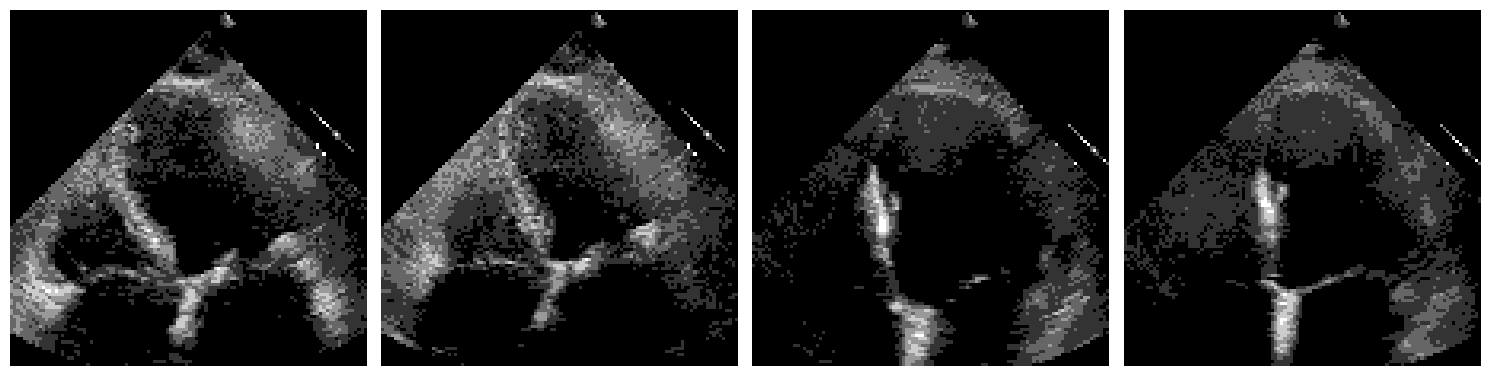

Tamaño de la matriz: (1924, 112, 112)


In [ ]:
# Cargar el archivo numpy
contraste_aumentado_ajustado = np.load("/content/drive/MyDrive/Echocardiography/contraste_aumentado.npy")
contraste_aumentado_ajustado = np.squeeze(contraste_aumentado_ajustado)
contraste_aumentado_ajustado = contraste_aumentado_ajustado[..., 0]  # Eliminar el último canal de color

contraste_aumentado_ajustado_40_50 = np.load("/content/drive/MyDrive/Echocardiography/contraste_aumentado_40_50.npy")
contraste_aumentado_ajustado_40_50 = np.squeeze(contraste_aumentado_ajustado_40_50)
contraste_aumentado_ajustado_40_50 = contraste_aumentado_ajustado_40_50[..., 0]  # Eliminar el último canal de color

# Mostrar las primeras 4 imágenes
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    # Obtener la imagen
    imagen = contraste_aumentado_ajustado_40_50[i]

    # Mostrar la imagen en el subplot correspondiente
    axes[i].imshow(imagen, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
tamaño_contraste = contraste_aumentado_ajustado_40_50.shape
print("Tamaño de la matriz:",tamaño_contraste)

Ahora vamos a agregar ruido a las imagenes

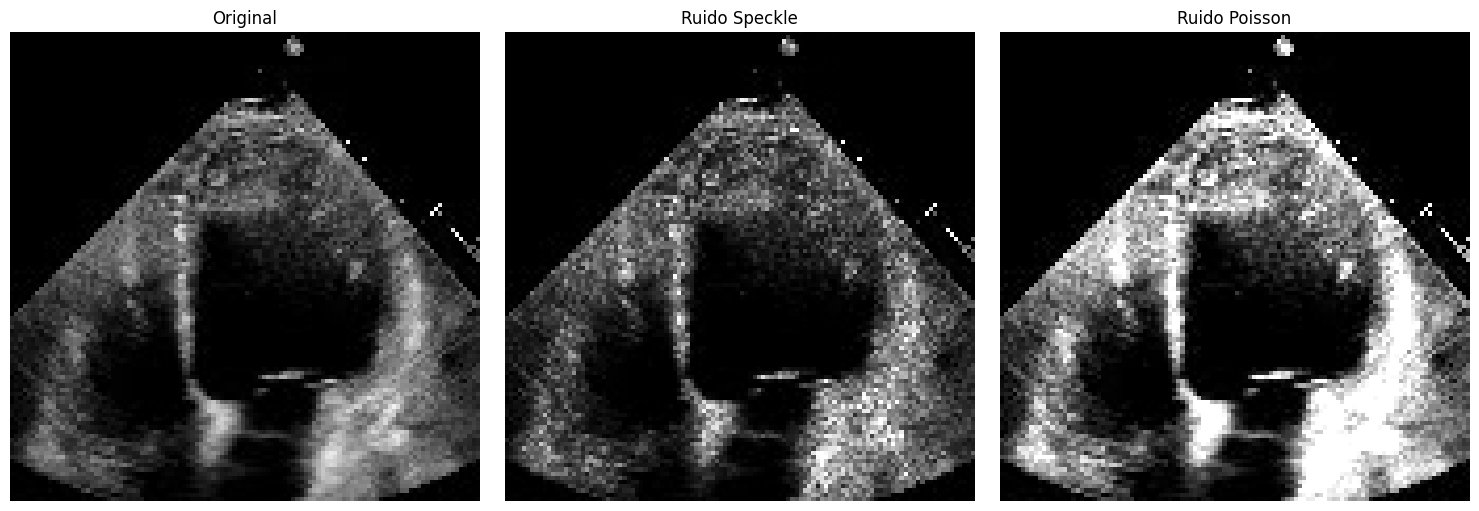

In [ ]:
# Obtener la imagen original
imagen = dataset_images[8].astype(np.float32)

# Generar ruido speckle
ruido_speckle = np.random.randn(*imagen.shape) * imagen

# Generar ruido poisson
ruido_poisson = np.random.poisson(imagen)

# Sumar el ruido a la imagen original
imagen_con_ruido_speckle = np.clip(imagen + ruido_speckle*0.25, 0, 255).astype(np.uint8)
imagen_con_ruido_poisson = np.clip(imagen + ruido_poisson*0.90, 0, 255).astype(np.uint8)

# Visualizar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagen original
axes[0].imshow(imagen, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Imagen con ruido speckle
axes[1].imshow(imagen_con_ruido_speckle, cmap='gray')
axes[1].set_title("Ruido Speckle")
axes[1].axis('off')

# Imagen con ruido poisson
axes[2].imshow(imagen_con_ruido_poisson, cmap='gray')
axes[2].set_title("Ruido Poisson")
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Obtener los índices de las imágenes que cumplen con la condición
indices_0_40 = np.where((dataset_points[:, -1] >= 0) & (dataset_points[:, -1] < 40))[0]
indices_40_50 = np.where((dataset_points[:, -1] >= 40) & (dataset_points[:, -1] < 50))[0]

# Crear una lista para almacenar las imágenes con ruido speckle
imagenes_ruido_speckle = []
imagenes_ruido_speckle_40_50 = []

# Crear una lista para almacenar las imágenes con ruido poisson
imagenes_ruido_poisson = []
imagenes_ruido_poisson_40_50 = []

# Aplicar ruido speckle y ruido poisson a las imágenes seleccionadas y guardarlas en las listas correspondientes
for indice in indices_0_40:
    # Cargar la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Generar ruido speckle
    ruido_speckle = np.random.randn(*imagen.shape) * imagen

    # Generar ruido poisson
    ruido_poisson = np.random.poisson(imagen)

    # Sumar el ruido a la imagen original
    imagen_con_ruido_speckle = np.clip(imagen + ruido_speckle*0.25, 0, 255).astype(np.uint8)
    imagen_con_ruido_poisson = np.clip(imagen + ruido_poisson*0.90, 0, 255).astype(np.uint8)

    # Agregar las imágenes con ruido a las listas correspondientes
    imagenes_ruido_speckle.append(imagen_con_ruido_speckle)
    imagenes_ruido_poisson.append(imagen_con_ruido_poisson)

for indice in indices_40_50:
    # Cargar la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Generar ruido speckle
    ruido_speckle_40_50 = np.random.randn(*imagen.shape) * imagen

    # Generar ruido poisson
    ruido_poisson_40_50 = np.random.poisson(imagen)

    # Sumar el ruido a la imagen original
    imagen_con_ruido_speckle_40_50 = np.clip(imagen + ruido_speckle_40_50*0.25, 0, 255).astype(np.uint8)
    imagen_con_ruido_poisson_40_50 = np.clip(imagen + ruido_poisson_40_50*0.90, 0, 255).astype(np.uint8)

    # Agregar las imágenes con ruido a las listas correspondientes
    imagenes_ruido_speckle_40_50.append(imagen_con_ruido_speckle_40_50)
    imagenes_ruido_poisson_40_50.append(imagen_con_ruido_poisson_40_50)

# Convertir las listas de imágenes en matrices numpy
imagenes_ruido_speckle = np.array(imagenes_ruido_speckle)
imagenes_ruido_poisson = np.array(imagenes_ruido_poisson)

imagenes_ruido_speckle_40_50 = np.array(imagenes_ruido_speckle_40_50)
imagenes_ruido_poisson_40_50 = np.array(imagenes_ruido_poisson_40_50)

# Guardar las imágenes con ruido
np.save('/content/drive/MyDrive/Echocardiography/imagenes_ruido_speckle.npy', imagenes_ruido_speckle)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_ruido_poisson.npy', imagenes_ruido_poisson)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_ruido_speckle_40_50.npy', imagenes_ruido_speckle_40_50)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_ruido_poisson_40_50.npy', imagenes_ruido_poisson_40_50)

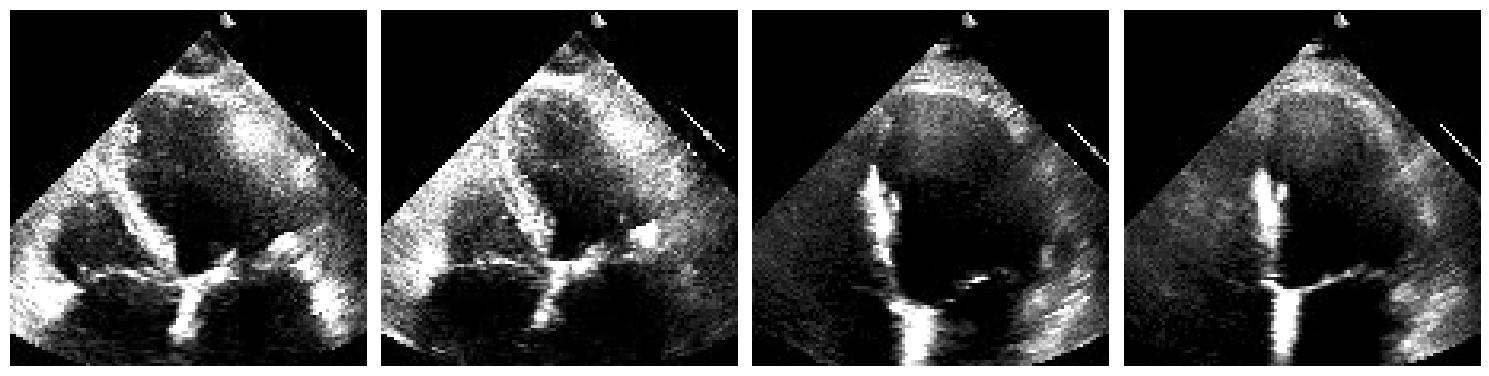

Tamaño de la matriz: (1924, 112, 112)


In [ ]:
imagenes_ruido_speckle = np.load("/content/drive/MyDrive/Echocardiography/imagenes_ruido_speckle.npy")
imagenes_ruido_speckle_40_50 = np.load("/content/drive/MyDrive/Echocardiography/imagenes_ruido_speckle_40_50.npy")
imagenes_ruido_poisson = np.load("/content/drive/MyDrive/Echocardiography/imagenes_ruido_poisson.npy")
imagenes_ruido_poisson_40_50 = np.load("/content/drive/MyDrive/Echocardiography/imagenes_ruido_poisson_40_50.npy")
# Mostrar las primeras 4 imágenes
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    # Obtener la imagen
    imagen = imagenes_ruido_poisson_40_50[i]

    # Mostrar la imagen en el subplot correspondiente
    axes[i].imshow(imagen, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
tamaño_speckle = imagenes_ruido_poisson_40_50.shape
print("Tamaño de la matriz:",tamaño_speckle )

Ahora aplicamos suavizado y enfoque de la imagen

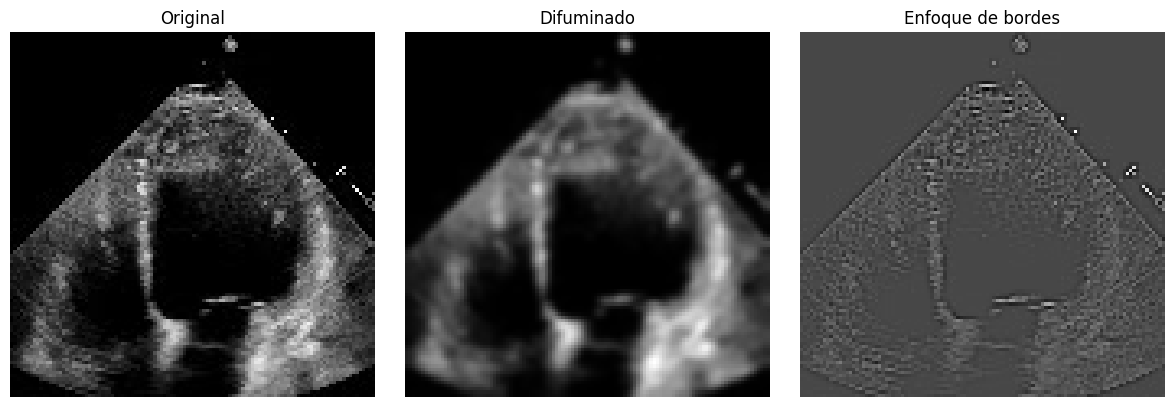

In [ ]:
# Cargar la imagen
imagen = dataset_images[8].astype(np.float32)

# Aplicar el método de blurring (suavizado)
blurred = cv2.GaussianBlur(imagen, (5, 5), 0)

# Aplicar el método de sharpening (enfoque)
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
sharpened = cv2.filter2D(imagen, -1, kernel)

# Mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(imagen, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Difuminado')
axes[1].axis('off')
axes[2].imshow(sharpened, cmap='gray')
axes[2].set_title('Enfoque de bordes')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Obtener los índices de las imágenes que cumplen con la condición
indices_0_40 = np.where((dataset_points[:, -1] >= 0) & (dataset_points[:, -1] < 40))[0]
indices_40_50 = np.where((dataset_points[:, -1] >= 40) & (dataset_points[:, -1] < 50))[0]

# Crear una lista para almacenar las imágenes procesadas con blurring
imagenes_blurring = []
imagenes_blurring_40_50 = []
# Crear una lista para almacenar las imágenes procesadas con sharpening
imagenes_sharpening = []
imagenes_sharpening_40_50 = []

# Aplicar blurring y sharpening a las imágenes seleccionadas y guardarlas en las listas correspondientes
for indice in indices_0_40:
    # Cargar la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Aplicar el método de blurring (difuminado)
    blurred = cv2.GaussianBlur(imagen, (5, 5), 0)

    # Agregar la imagen procesada con blurring a la lista
    imagenes_blurring.append(blurred)

    # Aplicar el método de sharpening (resaltado de bordes)
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    sharpened = cv2.filter2D(imagen, -1, kernel)

    # Agregar la imagen procesada con sharpening a la lista
    imagenes_sharpening.append(sharpened)

for indice in indices_40_50:
    # Cargar la imagen correspondiente
    imagen = dataset_images[indice].astype(np.float32)

    # Aplicar el método de blurring (difuminado)
    blurred_40_50 = cv2.GaussianBlur(imagen, (5, 5), 0)

    # Agregar la imagen procesada con blurring a la lista
    imagenes_blurring_40_50.append(blurred_40_50)

    # Aplicar el método de sharpening (resaltado de bordes)
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    sharpened_40_50 = cv2.filter2D(imagen, -1, kernel)

    # Agregar la imagen procesada con sharpening a la lista
    imagenes_sharpening_40_50.append(sharpened_40_50)

# Convertir las listas de imágenes en matrices numpy
imagenes_blurring = np.array(imagenes_blurring)
imagenes_sharpening = np.array(imagenes_sharpening)
imagenes_blurring_40_50 = np.array(imagenes_blurring_40_50)
imagenes_sharpening_40_50 = np.array(imagenes_sharpening_40_50)

# Guardar las imágenes procesadas con blurring en un archivo .npy
np.save('/content/drive/MyDrive/Echocardiography/imagenes_blurring.npy', imagenes_blurring)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_sharpening.npy', imagenes_sharpening)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_blurring_40_50.npy', imagenes_blurring_40_50)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_sharpening_40_50.npy', imagenes_sharpening_40_50)

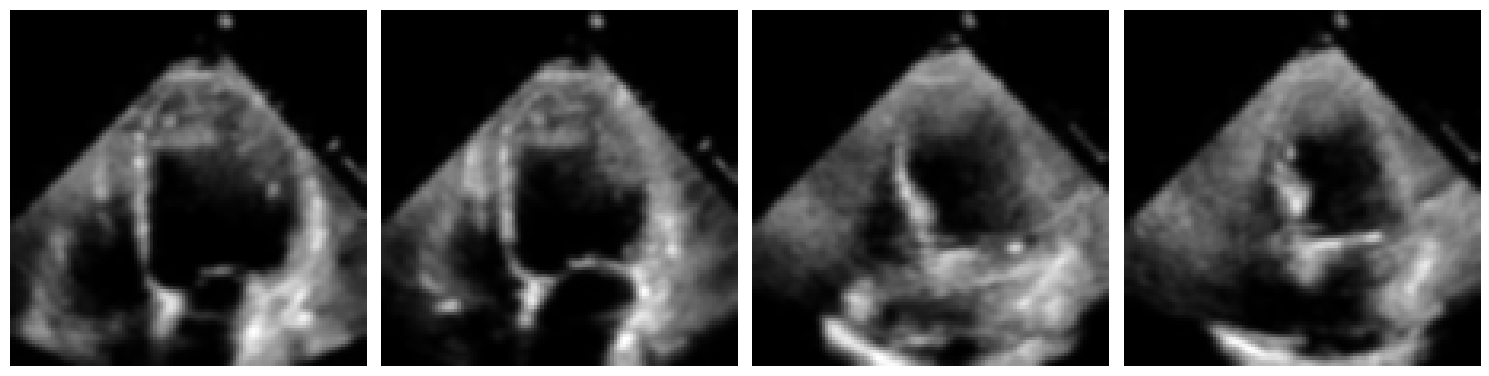

Tamaño de la matriz: (2512, 112, 112)


In [ ]:
imagenes_blurring = np.load("/content/drive/MyDrive/Echocardiography/imagenes_blurring.npy")
imagenes_blurring_40_50 = np.load("/content/drive/MyDrive/Echocardiography/imagenes_blurring_40_50.npy")
imagenes_sharpening = np.load("/content/drive/MyDrive/Echocardiography/imagenes_sharpening.npy")
imagenes_sharpening_40_50 = np.load("/content/drive/MyDrive/Echocardiography/imagenes_sharpening_40_50.npy")
# Mostrar las primeras 4 imágenes
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    # Obtener la imagen
    imagen = imagenes_blurring[i]

    # Mostrar la imagen en el subplot correspondiente
    axes[i].imshow(imagen, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
tamaño_blurring = imagenes_blurring.shape
print("Tamaño de la matriz:",tamaño_blurring )

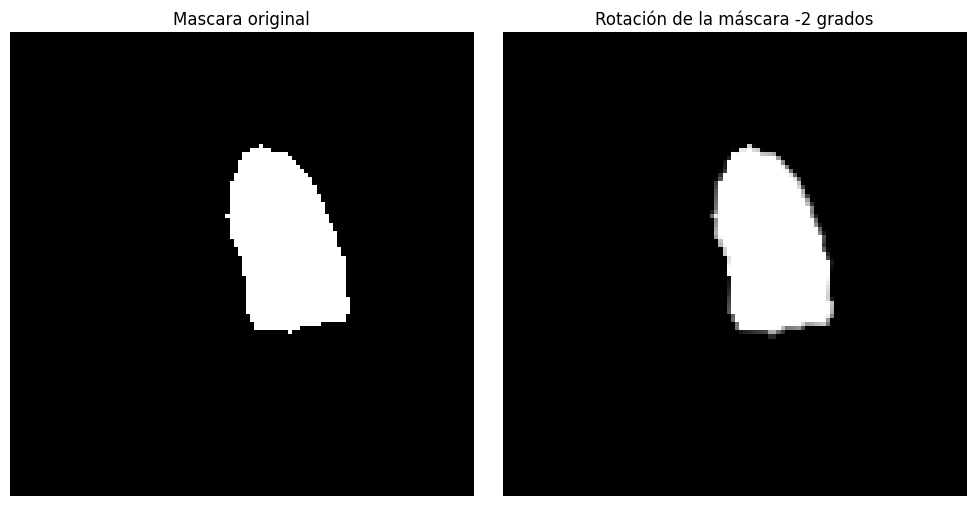

In [ ]:
# Obtener la imagen de la matriz tridimensional
mascara = dataset_mask[13].astype(np.float32)

# Definir el ángulo de rotación
angulo_m = -2

# Obtener el tamaño de la imagen
alto_m, ancho_m = image.shape[:2]

# Calcular el punto origen, para este caso es (ancho/2,0)
centro_m = (ancho_m // 2, 0)

# Definir la matriz de transformación
M = cv2.getRotationMatrix2D(centro_m, angulo_m, 1.0)

# Aplicar la rotación a la imagen
mascara_rotada = cv2.warpAffine(mascara, M, (ancho_m, alto_m))

# Visualizar la mascara original y la imagen rotada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(mascara, cmap='gray')
axes[0].set_title('Mascara original')
axes[0].axis('off')
axes[1].imshow(mascara_rotada,cmap='gray')
axes[1].set_title(f'Rotación de la máscara {angulo_m} grados')
axes[1].axis('off')
plt.tight_layout()
plt.show()

Guardar las imagenes rotadas

In [ ]:
# Crear listas para las imágenes rotadas
imagenes_rotadas_derecha_0_40 = []
imagenes_rotadas_izquierda_0_40 = []
mascaras_rotadas_derecha_0_40 = []
mascaras_rotadas_izquierda_0_40 = []

# Obtener los índices entre 0 y 40
indices_0_40 = np.where((dataset_points[:, -1] >= 0) & (dataset_points[:, -1] < 40))[0]

# Iterar sobre los índices y realizar la rotación de las imágenes correspondientes
for indice in indices_0_40:
    image = dataset_images[indice]
    image_m = dataset_mask[indice]

    # Definir el ángulo de rotación para la derecha y la izquierda
    angulo_derecha = 2
    angulo_izquierda = -2
    
    # Convertir la imagen a tipo de datos uint8
    image = image.astype(np.uint8)
    image_m = image_m.astype(np.uint8)

    # Obtener el tamaño de la imagen
    alto, ancho = image.shape[:2]
    alto_m, ancho_m = image_m.shape[:2]
    
    # Calcular el centro de la imagen
    centro = (ancho // 2, 0)
    centro_m = (ancho_m // 2, 0)
    
    M_derecha = cv2.getRotationMatrix2D(centro, angulo_derecha, 1.0)
    M_izquierda = cv2.getRotationMatrix2D(centro, angulo_izquierda, 1.0)
    M_derecha_m = cv2.getRotationMatrix2D(centro_m, angulo_derecha, 1.0)
    M_izquierda_m = cv2.getRotationMatrix2D(centro_m, angulo_izquierda, 1.0)
    
    # Aplicar la rotación a la imagen para la derecha
    imagen_rotada_derecha = cv2.warpAffine(image, M_derecha, (ancho, alto))
    imagen_rotada_derecha_m = cv2.warpAffine(image_m, M_derecha_m, (ancho_m, alto_m))
    
    # Aplicar la rotación a la imagen para la izquierda
    imagen_rotada_izquierda = cv2.warpAffine(image, M_izquierda, (ancho, alto))
    imagen_rotada_izquierda_m = cv2.warpAffine(image_m, M_izquierda_m, (ancho_m, alto_m))

    # Agregar las imágenes rotadas a las listas correspondientes
    imagenes_rotadas_derecha_0_40.append(imagen_rotada_derecha)
    imagenes_rotadas_izquierda_0_40.append(imagen_rotada_izquierda)
    mascaras_rotadas_derecha_0_40.append(imagen_rotada_derecha_m)
    mascaras_rotadas_izquierda_0_40.append(imagen_rotada_izquierda_m)

# Convertir las listas a arreglos numpy
imagenes_rotadas_derecha_0_40 = np.array(imagenes_rotadas_derecha_0_40)
imagenes_rotadas_izquierda_0_40 = np.array(imagenes_rotadas_izquierda_0_40)
mascaras_rotadas_derecha_0_40 = np.array(mascaras_rotadas_derecha_0_40)
mascaras_rotadas_izquierda_0_40 = np.array(mascaras_rotadas_izquierda_0_40)

# Combinar las matrices de imágenes rotadas a la derecha e izquierda
imagenes_rotadas_0_40 = np.concatenate((imagenes_rotadas_derecha_0_40, imagenes_rotadas_izquierda_0_40), axis=0)
mascaras_rotadas_0_40 = np.concatenate((mascaras_rotadas_derecha_0_40, mascaras_rotadas_izquierda_0_40), axis=0)

# Guardar las matrices tridimensionales en archivos .npy
np.save('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_derecha_0_40.npy', imagenes_rotadas_derecha_0_40)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_izquierda_0_40.npy', imagenes_rotadas_izquierda_0_40)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_0_40.npy', imagenes_rotadas_0_40)

np.save('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_derecha_0_40.npy', mascaras_rotadas_derecha_0_40)
np.save('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_izquierda_0_40.npy', mascaras_rotadas_izquierda_0_40)
np.save('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_0_40.npy', mascaras_rotadas_0_40)

In [ ]:
# Imagenes rotadas 
imagenes_rotadas_derecha_0_40 = np.load("/content/drive/MyDrive/Echocardiography/imagenes_rotadas_derecha_0_40.npy",allow_pickle=True)
imagenes_rotadas_izquierda_0_40 = np.load('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_izquierda_0_40.npy', allow_pickle=True)
imagenes_rotadas_0_40 = np.load('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_0_40.npy', allow_pickle=True)
size2 = imagenes_rotadas_derecha_0_40.shape
size3 = imagenes_rotadas_izquierda_0_40.shape
size4 = imagenes_rotadas_0_40 .shape
print("Tamaño de la matriz con imagenes rotadas 2°:", size2)
print("Tamaño de la matriz con imagenes rotadas -2°:", size3)
print("Tamaño de la matriz con imagenes rotadas:", size4)

#mascaras rotadas
mascaras_rotadas_derecha_0_40 = np.load("/content/drive/MyDrive/Echocardiography/mascaras_rotadas_derecha_0_40.npy",allow_pickle=True)
mascaras_rotadas_izquierda_0_40 = np.load('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_izquierda_0_40.npy', allow_pickle=True)
mascaras_rotadas_0_40 = np.load('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_0_40.npy', allow_pickle=True)
size5 = mascaras_rotadas_derecha_0_40.shape
size6 = mascaras_rotadas_izquierda_0_40.shape
size7 = mascaras_rotadas_0_40.shape
print("Tamaño de la matriz con mascaras rotadas 2°:", size5)
print("Tamaño de la matriz con mascaras rotadas -2°:", size6)
print("Tamaño de la matriz con mascaras rotadas:", size7)

Tamaño de la matriz con imagenes rotadas 2°: (2512, 112, 112)
Tamaño de la matriz con imagenes rotadas -2°: (2512, 112, 112)
Tamaño de la matriz con imagenes rotadas: (5024, 112, 112)
Tamaño de la matriz con mascaras rotadas 2°: (2512, 112, 112)
Tamaño de la matriz con mascaras rotadas -2°: (2512, 112, 112)
Tamaño de la matriz con mascaras rotadas: (5024, 112, 112)


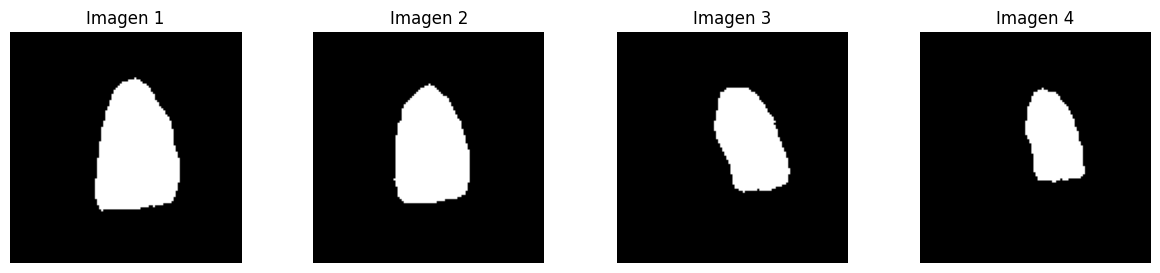

In [ ]:
# Muestra las primeras 4 imágenes
plt.figure(figsize=(15, 3))  
for i in range(4):
    plt.subplot(1, 4,i+1)
    image = mascaras_rotadas_izquierda_0_40[i].astype(np.float32)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Desactiva los ejes
    plt.title('Imagen {}'.format(i+1))  # Añade un título a cada imagen

plt.show()

In [ ]:
# Crear listas para las imágenes rotadas
imagenes_rotadas_derecha_40_50 = []
imagenes_rotadas_izquierda_40_50 = []
mascaras_rotadas_derecha_40_50 = []
mascaras_rotadas_izquierda_40_50 = []

# Obtener los índices entre 40 y 50
indices_40_50 = np.where((dataset_points[:, -1] >= 40) & (dataset_points[:, -1] < 50))[0]

# Iterar sobre los índices y realizar la rotación de las imágenes correspondientes
for indice in indices_40_50:
    image = dataset_images[indice]
    image_m = dataset_mask[indice]

    # Definir el ángulo de rotación para la derecha y la izquierda
    angulo_derecha = 2
    angulo_izquierda = -2
    
    # Convertir la imagen a tipo de datos uint8
    image = image.astype(np.uint8)
    image_m = image_m.astype(np.uint8)

    # Obtener el tamaño de la imagen
    alto, ancho = image.shape[:2]
    alto_m, ancho_m = image_m.shape[:2]
    
    # Calcular el centro de la imagen
    centro = (ancho // 2, 0)
    centro_m = (ancho_m // 2, 0)
    
    M_derecha = cv2.getRotationMatrix2D(centro, angulo_derecha, 1.0)
    M_izquierda = cv2.getRotationMatrix2D(centro, angulo_izquierda, 1.0)
    M_derecha_m = cv2.getRotationMatrix2D(centro_m, angulo_derecha, 1.0)
    M_izquierda_m = cv2.getRotationMatrix2D(centro_m, angulo_izquierda, 1.0)
    
    # Aplicar la rotación a la imagen para la derecha
    imagen_rotada_derecha = cv2.warpAffine(image, M_derecha, (ancho, alto))
    imagen_rotada_derecha_m = cv2.warpAffine(image_m, M_derecha_m, (ancho_m, alto_m))
    
    # Aplicar la rotación a la imagen para la izquierda
    imagen_rotada_izquierda = cv2.warpAffine(image, M_izquierda, (ancho, alto))
    imagen_rotada_izquierda_m = cv2.warpAffine(image_m, M_izquierda_m, (ancho_m, alto_m))

    # Agregar las imágenes rotadas a las listas correspondientes
    imagenes_rotadas_derecha_40_50.append(imagen_rotada_derecha)
    imagenes_rotadas_izquierda_40_50.append(imagen_rotada_izquierda)
    mascaras_rotadas_derecha_40_50.append(imagen_rotada_derecha_m)
    mascaras_rotadas_izquierda_40_50.append(imagen_rotada_izquierda_m)

# Convertir las listas a arreglos numpy
imagenes_rotadas_derecha_40_50 = np.array(imagenes_rotadas_derecha_40_50)
imagenes_rotadas_izquierda_40_50 = np.array(imagenes_rotadas_izquierda_40_50)
mascaras_rotadas_derecha_40_50 = np.array(mascaras_rotadas_derecha_40_50)
mascaras_rotadas_izquierda_40_50 = np.array(mascaras_rotadas_izquierda_40_50)

# Combinar las matrices de imágenes rotadas a la derecha e izquierda
imagenes_rotadas_40_50 = np.concatenate((imagenes_rotadas_derecha_40_50, imagenes_rotadas_izquierda_40_50), axis=0)
mascaras_rotadas_40_50 = np.concatenate((mascaras_rotadas_derecha_40_50, mascaras_rotadas_izquierda_40_50), axis=0)

# Guardar las matrices tridimensionales en archivos .npy
np.save('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_derecha_40_50.npy', imagenes_rotadas_derecha_40_50)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_izquierda_40_50.npy', imagenes_rotadas_izquierda_40_50)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_40_50.npy', imagenes_rotadas_40_50)

np.save('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_derecha_40_50.npy', mascaras_rotadas_derecha_40_50)
np.save('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_izquierda_40_50.npy', mascaras_rotadas_izquierda_40_50)
np.save('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_40_50.npy', mascaras_rotadas_40_50)

In [ ]:
# Imagenes rotadas 
imagenes_rotadas_derecha_40_50 = np.load("/content/drive/MyDrive/Echocardiography/imagenes_rotadas_derecha_40_50.npy",allow_pickle=True)
imagenes_rotadas_izquierda_40_50= np.load('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_izquierda_40_50.npy', allow_pickle=True)
imagenes_rotadas_40_50 = np.load('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_40_50.npy', allow_pickle=True)
size2 = imagenes_rotadas_derecha_40_50.shape
size3 = imagenes_rotadas_izquierda_40_50.shape
size4 = imagenes_rotadas_40_50.shape
print("Tamaño de la matriz con imagenes rotadas 2°:", size2)
print("Tamaño de la matriz con imagenes rotadas -2°:", size3)
print("Tamaño de la matriz con imagenes rotadas:", size4)

#mascaras rotadas
mascaras_rotadas_derecha_40_50 = np.load("/content/drive/MyDrive/Echocardiography/mascaras_rotadas_derecha_40_50.npy",allow_pickle=True)
mascaras_rotadas_izquierda_40_50 = np.load('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_izquierda_40_50.npy', allow_pickle=True)
mascaras_rotadas_40_50 = np.load('/content/drive/MyDrive/Echocardiography/mascaras_rotadas_40_50.npy', allow_pickle=True)
size5 = mascaras_rotadas_derecha_40_50.shape
size6 = mascaras_rotadas_izquierda_40_50.shape
size7 = mascaras_rotadas_40_50.shape
print("Tamaño de la matriz con mascaras rotadas 2°:", size5)
print("Tamaño de la matriz con mascaras rotadas -2°:", size6)
print("Tamaño de la matriz con mascaras rotadas:", size7)

Tamaño de la matriz con imagenes rotadas 2°: (1924, 112, 112)
Tamaño de la matriz con imagenes rotadas -2°: (1924, 112, 112)
Tamaño de la matriz con imagenes rotadas: (3848, 112, 112)
Tamaño de la matriz con mascaras rotadas 2°: (1924, 112, 112)
Tamaño de la matriz con mascaras rotadas -2°: (1924, 112, 112)
Tamaño de la matriz con mascaras rotadas: (3848, 112, 112)


Para crear una matriz tridimensional con todas imagenes pero rotadas 2°

In [ ]:
# Crear una matriz tridimensional para almacenar las imágenes rotadas
imagenes_rotadas_derecha = np.zeros_like(dataset_images)

# Iterar sobre las imágenes originales y realizar la rotación
for i, image in enumerate(dataset_images):
    
    # Convertir la imagen a tipo de datos uint8
    image = image.astype(np.uint8)

    # Obtener el tamaño de la imagen
    alto, ancho = image.shape[:2]
    
    # Calcular el centro de la imagen
    centro = (ancho // 2, 0)
    
    # Definir la matriz de transformación
    M = cv2.getRotationMatrix2D(centro, angulo, 1.0)
    
    # Aplicar la rotación a la imagen
    imagen_rotada = cv2.warpAffine(image, M, (ancho, alto))
    
    # Guardar la imagen rotada en la matriz tridimensional
    imagenes_rotadas_derecha[i] = imagen_rotada

# Guardar la matriz tridimensional en un archivo .npy
np.save('/content/drive/MyDrive/Echocardiography/imagenes_rotadas_derecha.npy', imagenes_rotadas_derecha)

Combinar todos los archivos .numpy

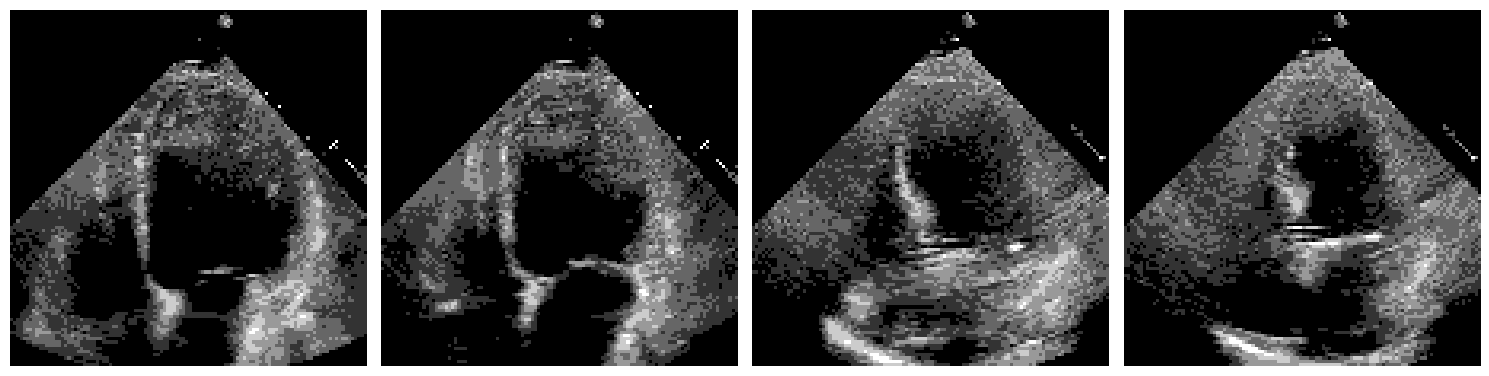

Tamaño de la matriz: (15072, 112, 112)


In [ ]:
imagenes_0_40_suma = np.concatenate((imagenes_rotadas_0_40,brillo_aumentado_ajustado,contraste_aumentado_ajustado,imagenes_ruido_poisson,imagenes_blurring), axis=0)
imagenes_40_50_suma = np.concatenate((imagenes_rotadas_40_50,brillo_aumentado_ajustado_40_50,contraste_aumentado_ajustado_40_50,imagenes_ruido_speckle_40_50,imagenes_ruido_poisson_40_50,imagenes_blurring_40_50,imagenes_sharpening_40_50), axis=0) 
np.save('/content/drive/MyDrive/Echocardiography/imagenes_0_40_suma.npy', imagenes_0_40_suma)
np.save('/content/drive/MyDrive/Echocardiography/imagenes_40_50_suma.npy', imagenes_40_50_suma)
# Obtener las imágenes con índices 2512 a 2515
imagenes_visualizar = imagenes_0_40_suma[7536:7540]

# Crear un subplot para mostrar las imágenes
fig, axes = plt.subplots(1, len(imagenes_visualizar), figsize=(15, 5))

# Mostrar las imágenes en el subplot correspondiente
for i in range(len(imagenes_visualizar)):
    # Obtener la imagen
    imagen = imagenes_visualizar[i]

    # Mostrar la imagen en el subplot correspondiente
    axes[i].imshow(imagen, cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

tamaño_imagenes_0_40_suma = imagenes_0_40_suma.shape
print("Tamaño de la matriz:",tamaño_imagenes_0_40_suma )